## Usage of PyTorch to perform clustering using the k-means algorithm. We'll generate some random data points and then use PyTorch to cluster them into K clusters. Here's a step-by-step example:

### This example demonstrates how to use PyTorch to implement and train a simple K-means clustering model. We can adjust the number of clusters (n_clusters), data features, and other parameters to fit our specific clustering problem.

In [1]:
# !pip install torch

In [2]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

### Generate some random data points. In this example, we'll generate 2D data points using make_blobs from scikit-learn:

In [3]:
n_samples = 300
n_features = 2
n_clusters = 3

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

### Convert the data to a PyTorch tensor: 

In [4]:
data = torch.tensor(X, dtype=torch.float32)

### Define a K-means clustering model using PyTorch. We'll use the following steps:

Initialize K cluster centroids randomly.
Assign each data point to the nearest centroid.
Update the centroids as the mean of data points assigned to them.
Repeat the assignment and update steps for a fixed number of iterations or until convergence.

In [5]:
class KMeans(nn.Module):
    def __init__(self, n_clusters, n_features):
        # super(KMeans, self).__init__() - ?
        super().__init__()
        self.n_clusters = n_clusters
        self.centroids = nn.Parameter(torch.randn(n_clusters, n_features))

    def forward(self, x):
        # Compute pairwise distances between data points and centroids
        distances = torch.cdist(x, self.centroids)
        # Assign each point to the nearest centroid
        labels = torch.argmin(distances, dim=1)
        return labels

### Create an instance of the KMeans model and define the optimization criterion. In this case, we'll use Mean Squared Error (MSE) loss:

In [6]:
model = KMeans(n_clusters, n_features)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

### Train the model by iteratively updating centroids and assigning data points until convergence:

In [7]:
num_iterations = 100
for i in range(num_iterations):
    # Apply the module to the data - output
    labels = model(data)
    # Compute loss
    loss = criterion(data, model.centroids[labels])
    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Visualize the results:

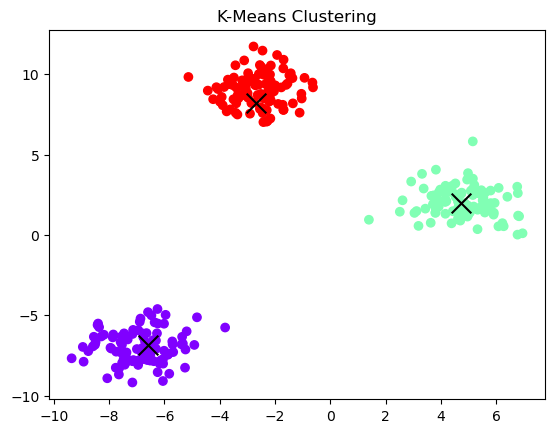

In [8]:
data = data.numpy()
labels = labels.numpy()

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.scatter(model.centroids.detach().numpy()[:, 0], model.centroids.detach().numpy()[:, 1], marker='x', s=200, c='black')
plt.title('K-Means Clustering')
plt.show()